## Import modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
outdir = "../../docs/results/latest/misc"
# Create output directory if it doesn't exist
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [3]:
from config import *

SCRIPT_NAME = "misc"

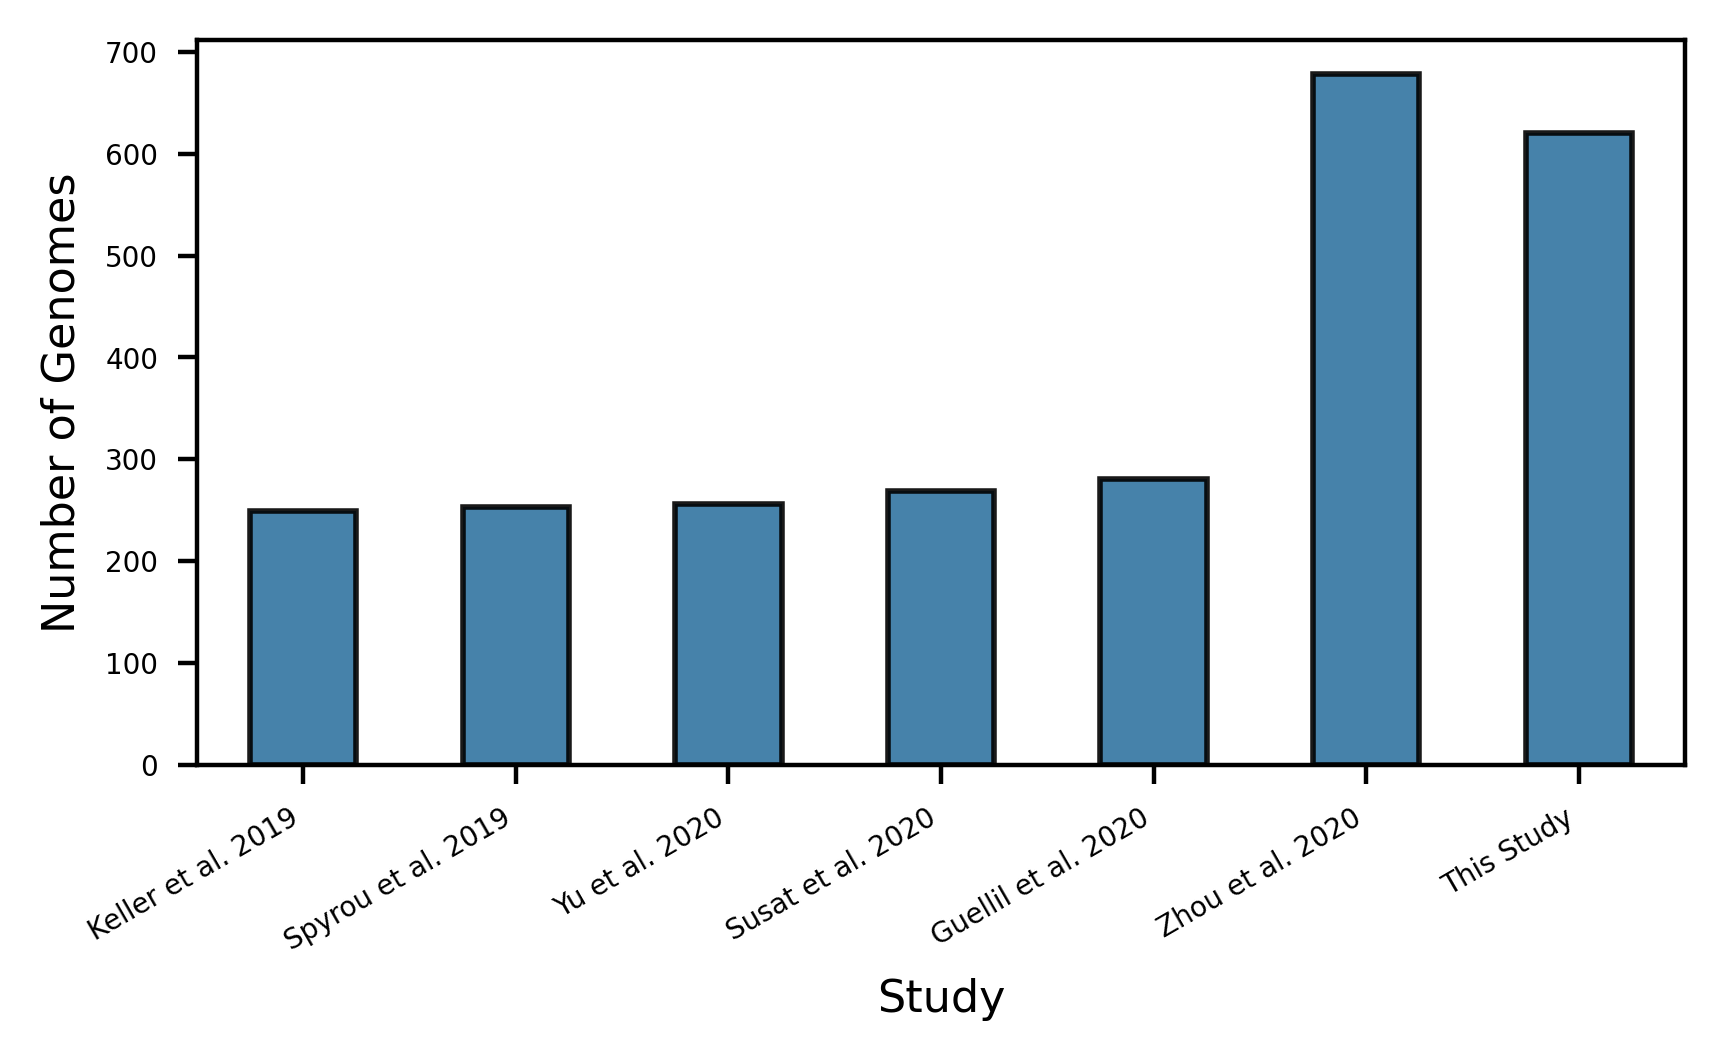

In [4]:
study = ['Keller et al. 2019', 
         'Spyrou et al. 2019', 
         'Yu et al. 2020', 
         'Susat et al. 2020', 
         'Guellil et al. 2020', 
         'Zhou et al. 2020',
         'This Study']

# Modern + Ancient
genomes = [
    233 + 16, 
    233 + 20, 
    228 + 28, 
    233 + 36, 
    231 + 50, 
    622 + 56,
    559 + 61]

df = pd.DataFrame()
df["Study"] = study
df["Genomes"] = genomes


fig, ax1 = plt.subplots(1, dpi=dpi, figsize=figsize_mini)

g = sns.barplot(data = df, 
                x="Study", 
                y="Genomes", 
                ax=ax1, 
                color=DISC_CMAPLIST[0],
                edgecolor="black",
                alpha=0.9,
               )

bar_widths = [0.5 for bar in study]


for bar, new_width in zip(ax1.patches, bar_widths):
    x = bar.get_x()
    width = bar.get_width()
    centre = x + width/2.
    bar.set_x(centre - new_width/2.)
    bar.set_width(new_width)
    
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30, ha="right")
ax1.set_xlabel("Study")
ax1.set_ylabel("Number of Genomes")

#ax1.legend(frameon=True, title="Genome Origin", borderpad = 1.5, edgecolor="black" )

# --------------------------------------------
# Save
out_path = os.path.join(outdir, SCRIPT_NAME + "_study_compare." + FMT)
plt.savefig(out_path, dpi=dpi, bbox_inches = "tight")

## Interactive